This is a sandpit to play around with panda, numpy, scipy and sklearn on a very simple linear regression. Having such a simple dataset  to play with (it's only got one feature) means I can concentrate on using the commands rather than being overly concerned about the data. I am following a process of:

1. Load data
2. Clean data
3. Train model with training dataset
4. Have a look at the statistics
5. Test the trained model with provided test dataset

It would be great if someone could verify the statistical assumptions and use of the formulas below. It's the first time I have used them, so there could be mistakes!!

In [1]:
# Import the required libraries
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math   # yep! going to a bit of maths later!!
from scipy import stats as st # and some stats

# Load up the files 
dirty_training_set = pd.read_csv('../input/train.csv')
dirty_test_set = pd.read_csv('../input/test.csv')

#...but clean the data by dropping an dodgy data
training_set = dirty_training_set.dropna() 
test_set = dirty_test_set.dropna() 

#... and see the effect of this
print ("Rows before clean: ", dirty_training_set.size, "\n")
print ("Rows after clean: ", training_set.size, "\n")

# Let's print some of the training data - just to get used to using panda
print (training_set.loc[0:5]['y'])
print (training_set.loc[0:5]['x'])

Rows before clean:  1400 

Rows after clean:  1398 

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
Name: y, dtype: float64
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
5    36.0
Name: x, dtype: float64


In [2]:
x_training_set = training_set.as_matrix(['x'])
y_training_set = training_set.as_matrix(['y'])


x_test_set = test_set.as_matrix(['x'])
y_test_set = test_set.as_matrix(['y'])

# Review some of the statistics to check whether the data is skewed
print ("Mean of X Training set: ", np.mean(x_training_set), "\n")
print ("Median of X Training set: ", np.median(x_training_set), "\n")
print ("Mean of Y Training set: ", np.mean(y_training_set), "\n")
print ("Median of Y Training set: ", np.median(y_training_set), "\n")
print ("Std Dev of X Training set: ", np.std(x_training_set), "\n")
print ("Std Dev of Y Training set: ", np.std(y_training_set), "\n")

Mean of X Training set:  50.0143061516 

Median of X Training set:  49.0 

Mean of Y Training set:  49.9398691705 

Median of Y Training set:  48.97302037 

Std Dev of X Training set:  28.9338413853 

Std Dev of Y Training set:  29.0883876043 



Median and mean are similar so the training set isn't skewed by any outliers that might cause leverage when doing the linear regression

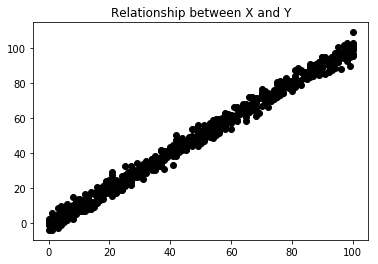

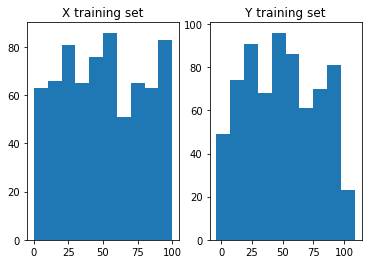

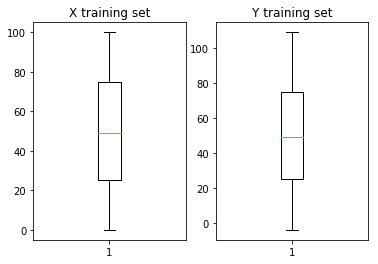

In [3]:

# So let's plot some of the data 
# - this gives some core routines to experiment with different parameters
plt.title('Relationship between X and Y')
plt.scatter(x_training_set, y_training_set,  color='black')
plt.show()

# Use subplot to have graphs side by side
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(y_training_set)
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(y_training_set)
plt.show()

Does really show very much but we are not really here for the data.  The data isn't normal and there doesn't seem to be any outliers to worry about.

In [4]:
# Now to set up the linear regression model
# Create linear regression object
lm = linear_model.LinearRegression()
# ... then fir it
lm.fit(x_training_set,y_training_set)

# Have a look at R sq to give an idea of the fit 
print('R sq: ',lm.score(x_training_set,y_training_set))

# and so the correlation is..
print('Correlation: ', math.sqrt(lm.score(x_training_set,y_training_set)))


R sq:  0.990701531903
Correlation:  0.9953399077212527


Now that's what I call a good R sq and correlation!!! The positive correlation shows that as Y increases
so does X.

In [5]:
# This the coefficient for the single feature
print("Coefficient for X ", lm.coef_)

# Get the standard error
print ("Standard Error: ",st.sem(x_training_set))
# Our hypothesis test for this is that there is no difference between the coefficient and the true value
# that the coefficient should be
ttest = lm.coef_/st.sem(x_training_set)
print ("The t-statistic:",ttest)

# but we need the p-value to help determine the probablity that we have a correct t-statistic
print ("Two tailed p-values: ")
st.pearsonr(x_training_set, y_training_set)


Coefficient for X  [[ 1.00065638]]
Standard Error:  [ 1.09516205]
The t-statistic: [[ 0.91370623]]
Two tailed p-values: 


(array([ 0.99533991]), array([ 0.]))

Although we haven't a normal distribution I have done these calculations - just because.

In [6]:
# This the F-statistic that shows whether there is a relationship between the response and the predictors
# I couldn't find a function for this so I have done the calcs by hand
# First get the total sum of the squares.
TSS = y_training_set
TSS = [i**2 for i in TSS]   # Using list comprehension to square each element
TSS = np.sum(TSS)

# This calculates the residual sum of the squares
y_predicted = lm.predict(x_training_set)   # These are predicted values of Y
y_variance = y_training_set - y_predicted # These are the residuals bewteen actual values of Y and the predcitions
y_variance = [i**2 for i in y_variance]   # Using list comprehension to square each element
RSS = np.sum(y_variance)

# As we only have one feature the f-statistic formula = ((TSS -RSS)/p)/(RSS/(n - p -1)) becomes
#(TSS - RSS)/(RSS/ (n - 2) )
Fstatistic = (TSS - RSS) / (RSS/(np.size(y_predicted) - 2))
print ("The F-statistic is:  ", Fstatistic)





The F-statistic is:   295202.869087


Which is pretty huge so I think we can safely say there is a relationship. As we've got a pretty good
model let's run it against the test set.

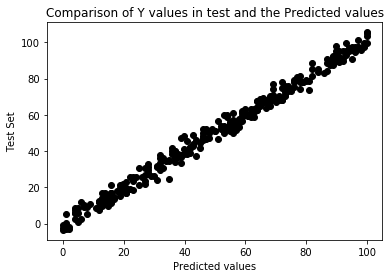

In [7]:
# So let's run the model against the test data
y_predicted = lm.predict(x_test_set)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_predicted, y_test_set,  color='black')
plt.show()

As we expected it's a really good fit!!